# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
df = pd.read_csv(url, header=0, dtype={'sex': 'category', 'time': 'category', 'smoker': 'category', 'day':'category'})
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

In [3]:
df = df.drop(columns='Unnamed: 0')

### Step 5. Plot the total_bill column histogram

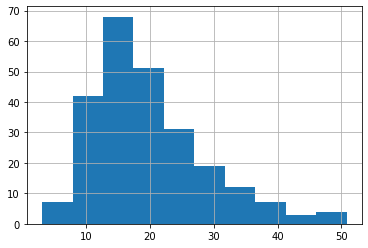

In [4]:
df.total_bill.hist()
plt.show()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

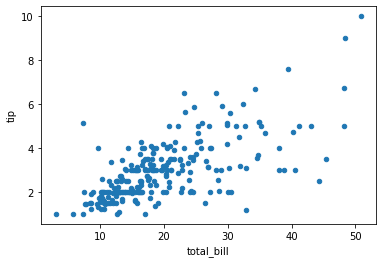

In [5]:
df.plot(kind='scatter', x='total_bill', y='tip')
plt.show()

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

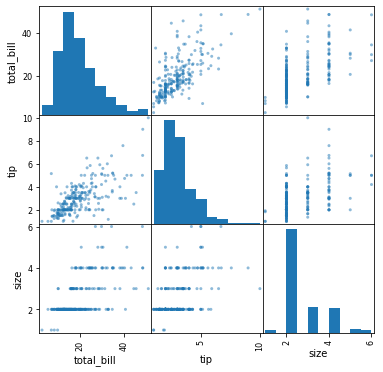

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['total_bill', 'tip', 'size']], figsize=(6, 6))
plt.show()

### Step 8. Present the relationship between days and total_bill value

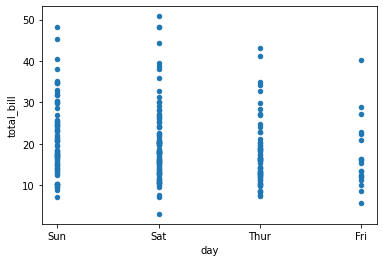

In [7]:
df.plot(kind='scatter', x='day', y='total_bill')
plt.show()

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

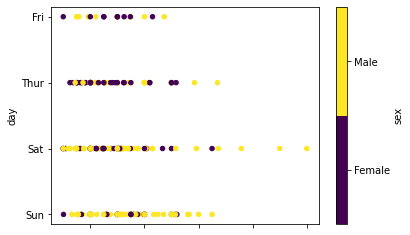

In [8]:
df.plot(kind='scatter', y='day', x='tip', c='sex', cmap='viridis')
plt.show()

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

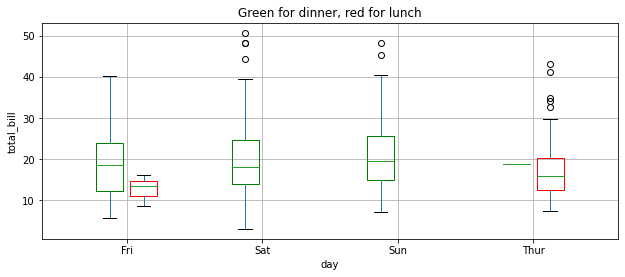

In [9]:
# df.groupby('time').boxplot(column='total_bill', by='day', figsize=(10, 5))

fig, ax = plt.subplots(figsize=(10, 4))
positions = np.arange(len(df.day.cat.categories))
colors = ['green', 'red']
times= df.time.cat.categories

handles = []
for i, (name, time_df) in enumerate(df.groupby('time')):
    i_pos = positions + (i - 1/2) * 1/4
    time_df.boxplot('total_bill', by='day', ax=ax, positions=i_pos, widths=0.2, boxprops=dict(c=colors[i]))


    
plt.xticks(positions, df.day.cat.categories)
plt.ylabel('total_bill')
fig.suptitle('')
plt.title('Green for dinner, red for lunch')
plt.show()

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

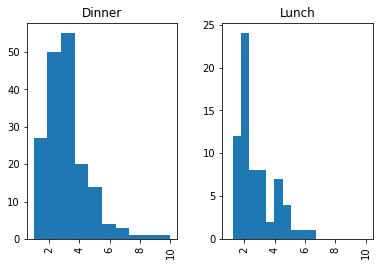

In [10]:
df[['time', 'tip']].hist(by='time', figsize=(6, 4), sharex=True);

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

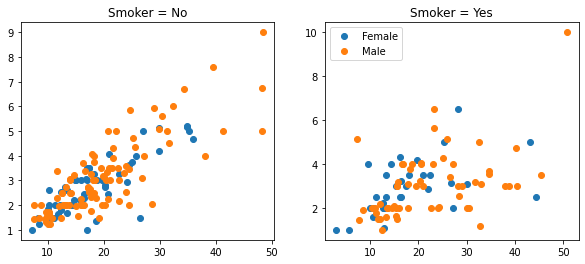

In [11]:
_, axes = plt.subplots(ncols=2, figsize=(10, 4))
groups = df.groupby('smoker')

for ax, (name, group) in zip(axes, groups):
    ax.set_title('Smoker = {}'.format(name))
    for gender, gender_group in group.groupby('sex'):
        ax.plot('total_bill', 'tip', data=gender_group, linestyle='', label=gender, marker='o')
plt.legend()
plt.show()

### BONUS: Create your own question and answer it using a graph.

What is the relation between the group size and the relative tip?

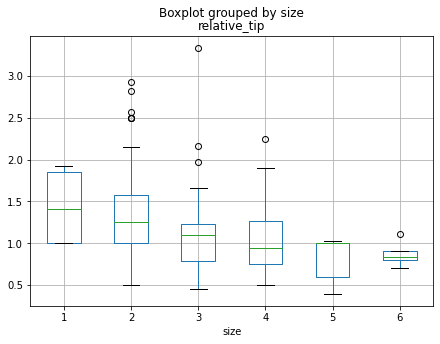

In [12]:
df['relative_tip'] = df['tip'] / df['size']
df.boxplot(column='relative_tip', by='size', figsize=(7, 5))
plt.show()

Interestingly enough, it seems like there is a negative correlation between the party size, and how much tip each person is paying. One possible explanation is that as the party grows, people tend to eat less.